<font size=5> Preprocessing

In [1]:
import pandas as pd
import numpy as np
import operator
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
rent_data = pd.read_excel("https://www.dffh.vic.gov.au/sites/default/files/documents/202209/Moving%20annual%20rent%20by%20suburb%20-%20June%20quarter%202022.xlsx", sheet_name='All properties')
rent_data = rent_data.loc[2:]
rent_data.drop(['Moving annual median rent by suburb'],axis=1,inplace=True)
rent_data = rent_data.loc[:,::2]
rent_data.rename(columns={'Unnamed: 1':'suburb'}, inplace = True)
rent_data.head()


,suburb,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,...,Unnamed: 163,Unnamed: 165,Unnamed: 167,Unnamed: 169,Unnamed: 171,Unnamed: 173,Unnamed: 175,Unnamed: 177,Unnamed: 179,Unnamed: 181
2,Albert Park-Middle Park-West St Kilda,260,260,270,275,275,280,280,290,300,...,600,580,550,550,500,500,500,495,500,520
3,Armadale,200,200,205,210,215,220,225,230,233,...,500,500,500,495,450,440,425,420,430,450
4,Carlton North,260,260,265,270,270,275,280,280,290,...,585,590,590,590,580,575,575,580,580,595
5,Carlton-Parkville,260,260,260,260,260,260,265,270,270,...,404,400,400,395,350,340,330,320,310,319
6,CBD-St Kilda Rd,320,320,320,320,320,320,320,320,320,...,510,495,460,420,380,369,350,350,364,390


In [3]:
#Preprocess suburb
data_suburb = pd.DataFrame()
sublist = []
for i in rent_data["suburb"]:
    index = rent_data[rent_data.suburb == i].index.tolist()[0]
    if operator.contains(i, "-"):
        j = i.split("-")
        for sub in j:
            sublist.append(sub)
            series = pd.DataFrame(rent_data[index-2:index-1])
            data_suburb = pd.concat([data_suburb, series])
    else:
        sublist.append(i)
        series = pd.DataFrame(rent_data[index-2:index-1])
        data_suburb = pd.concat([data_suburb, series])

data_suburb.insert(0, "suburb new", sublist)
data_suburb.drop(data_suburb.columns[1:2],axis=1,inplace=True)
data_suburb

,suburb new,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,...,Unnamed: 163,Unnamed: 165,Unnamed: 167,Unnamed: 169,Unnamed: 171,Unnamed: 173,Unnamed: 175,Unnamed: 177,Unnamed: 179,Unnamed: 181
2,Albert Park,260,260,270,275,275,280,280,290,300,...,600,580,550,550,500,500,500,495,500,520
2,Middle Park,260,260,270,275,275,280,280,290,300,...,600,580,550,550,500,500,500,495,500,520
2,West St Kilda,260,260,270,275,275,280,280,290,300,...,600,580,550,550,500,500,500,495,500,520
3,Armadale,200,200,205,210,215,220,225,230,233,...,500,500,500,495,450,440,425,420,430,450
4,Carlton North,260,260,265,270,270,275,280,280,290,...,585,590,590,590,580,575,575,580,580,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Wanagaratta,125,125,130,130,130,130,130,135,135,...,290,300,300,308,320,330,350,360,370,380
157,Warragul,130,135,135,135,135,135,140,140,150,...,350,350,360,380,375,380,390,390,400,400
158,Warrnambool,130,135,135,135,140,140,140,145,145,...,340,340,340,350,350,360,370,380,400,400
159,Wodonga,145,145,150,150,150,150,150,150,150,...,330,330,330,330,340,350,360,370,380,390


In [4]:
#remove duplicates
data_suburb = data_suburb.drop_duplicates(subset='suburb new', inplace=False)

In [5]:
#remove dockland data as it has '-', which can not be convert to interger
past_rent = data_suburb.drop([8])

In [6]:
#covert str to int
count = 0
for i in past_rent.columns.tolist():
    count += 1
    if count > 1:
        past_rent[i]=pd.to_numeric(past_rent[i])
    

In [7]:
rent_past = past_rent.iloc[:,0:89]

In [8]:
rent_22 = past_rent.loc[:,['suburb new', 'Unnamed: 179', 'Unnamed: 181']]
rent_22['average']=(rent_22[['Unnamed: 179','Unnamed: 181']].sum(axis=1))/2
rent_22 = rent_22.loc[:,['suburb new', 'average']]
rent_22.to_csv("../data/curated/22_rent_data.csv")
rent_22

,suburb new,average
2,Albert Park,510.0
2,Middle Park,510.0
2,West St Kilda,510.0
3,Armadale,440.0
4,Carlton North,587.5
...,...,...
155,Traralgon,370.0
156,Wanagaratta,375.0
157,Warragul,400.0
158,Warrnambool,400.0


In [9]:
#get yearly data
year = 2000
list_col = []
count = 1
num = 0
for i in rent_past.columns[1:89]:
    list_col.append(i)
    if count == 4:
        rent_past[year+num] =  (rent_past[list_col[0]] + rent_past[list_col[1]] + rent_past[list_col[2]] + rent_past[list_col[3]])/4
        count = 1
        num += 1
        list_col = []
    else:
        count += 1
    

/var/folders/h8/pms0342s7y575pq3kcbl9db00000gn/T/ipykernel_3780/761707456.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rent_past[year+num] =  (rent_past[list_col[0]] + rent_past[list_col[1]] + rent_past[list_col[2]] + rent_past[list_col[3]])/4
/var/folders/h8/pms0342s7y575pq3kcbl9db00000gn/T/ipykernel_3780/761707456.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rent_past[year+num] =  (rent_past[list_col[0]] + rent_past[list_col[1]] + rent_past[list_col[2]] + rent_past[list_col[3]])/4
/var/folders/h8/pms0342s7y575pq3

In [10]:
rent_past.drop(rent_past.columns[1:89],axis=1,inplace=True)
rent_past.to_csv("../data/curated/past_rent_data.csv")


In [11]:
#add a row to show the median rprice among all suburb yearly
data_sum = rent_past[[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]].median()
rent_past.loc[rent_past.index.max()+1] = data_sum
rent_past.loc[rent_past.index.max(),'suburb new'] = 'total'
rent_past.tail()

,suburb new,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
156,Wanagaratta,127.50,131.25,135.0,142.50,153.25,162.50,172.50,181.25,187.50,...,221.25,235.0,247.50,250.00,260.00,266.25,274.25,287.50,299.5,340.00
157,Warragul,133.75,137.50,152.5,163.75,173.75,182.50,187.50,193.25,202.75,...,259.75,267.5,272.75,280.00,293.75,305.00,323.75,347.00,360.0,383.75
158,Warrnambool,133.75,141.25,150.0,163.75,178.75,193.75,203.25,212.50,222.50,...,282.50,280.0,280.00,285.00,288.75,290.00,300.00,322.50,342.5,365.00
159,Wodonga,147.50,150.00,155.0,167.50,181.25,192.50,210.00,218.75,227.50,...,261.75,270.0,280.00,287.50,290.00,298.75,302.50,318.75,330.0,355.00
160,total,176.25,185.00,195.0,203.75,210.00,218.75,227.50,251.75,289.00,...,350.00,350.0,352.75,363.75,373.25,393.75,410.00,422.50,420.0,405.00


In [12]:
#make a dataframe which contain median rent and year
data_list = rent_past.iloc[215].values.tolist()
Y=(data_list[1:23])
X = ['2000','2001','2002','2003','2004','2005','2006','2007',\
    '2008','2009','2010','2011','2012','2013','2014','2015',\
    '2016','2017','2018','2019','2020','2021']
total = {"Year": X,
         "Mediann": Y}
yearly_rent= pd.DataFrame(total)
yearly_rent.to_csv("../data/curated/total_rent_data_yearly.csv", index=False)

In [13]:
yearly_rent

,Year,Mediann
0,2000,176.25
1,2001,185.00
2,2002,195.00
3,2003,203.75
4,2004,210.00
5,2005,218.75
6,2006,227.50
7,2007,251.75
8,2008,289.00
9,2009,313.25


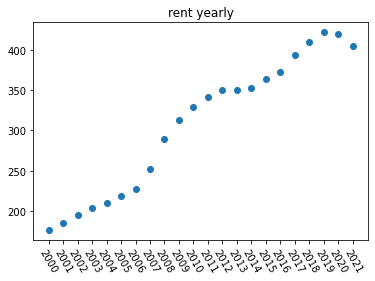

In [14]:
#scatter plot 
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.xticks(rotation=300)
plt.title('rent yearly')
plt.show()


<font size = 5> Modelling

In [15]:
yearly_rent = pd.read_csv("../data/curated/total_rent_data_yearly.csv")
x = yearly_rent.iloc[:,:-1].values
y = yearly_rent.iloc[:,-1].values

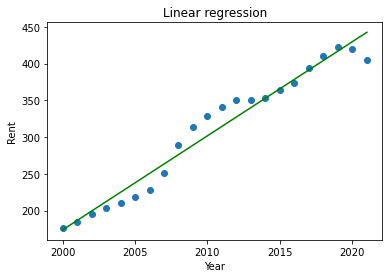

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
y_predict = lin_reg.predict(x)
plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Rent')
plt.title('Linear regression')
plt.plot(x, y_predict, color='g')
plt.savefig('../plots/Rent_Linear_regression.png')
plt.show()

In [17]:
Poly_regressor = PolynomialFeatures(degree=2)
Poly_X = Poly_regressor.fit_transform(x)
regressor = LinearRegression()
regressor.fit(Poly_X,y)

LinearRegression()

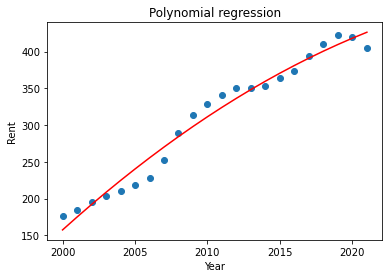

In [25]:
plt.scatter(x,y)
plt.plot(x,regressor.predict(Poly_regressor.fit_transform(x)),color='red')
plt.xlabel('Year')
plt.ylabel('Rent')
plt.title('Polynomial regression')
plt.savefig('../plots/Rent_Polynomial_regression.png')
plt.show()

In [19]:
predicted_2022 = regressor.predict(Poly_regressor.fit_transform([[2022]]))
predicted_2023 = regressor.predict(Poly_regressor.fit_transform([[2023]]))
predicted_2024 = regressor.predict(Poly_regressor.fit_transform([[2024]]))
predicted_2025 = regressor.predict(Poly_regressor.fit_transform([[2025]]))
print(predicted_2022)
print(predicted_2023)
print(predicted_2024)
print(predicted_2025)

[433.83279221]
[440.9846838]
[447.66540797]
[453.87496472]


In [27]:
future_3 = (predicted_2023 + predicted_2024 + predicted_2025)/3
future_3

array([447.50835216])

<font size=5>past rent rate

In [28]:
rent_22.head()


,suburb new,average,rate
2,Albert Park,510.0,-11.004909
2,Middle Park,510.0,-11.004909
2,West St Kilda,510.0,-11.004909
3,Armadale,440.0,3.153401
4,Carlton North,587.5,-22.744687


In [31]:
rate = []
for index in rent_22['average']:
    rate.append(((447.50835216 - index) / index) *100)

In [32]:
rent_22['rate'] = rate
rent_22.sort_values('rate').tail(10)

,suburb new,average,rate
145,Mildura,340.0,31.620104
122,Corio,330.0,35.608592
144,Horsham,330.0,35.608592
5,Carlton,314.5,42.292004
5,Parkville,314.5,42.292004
143,Hamilton,310.0,44.357533
153,Swan Hill,300.0,49.169451
146,Newborough,295.0,51.697746
146,Moe,295.0,51.697746
147,Morwell,285.0,57.020474


In [34]:
rent_22.to_csv("../data/curated/Rate_22_rent_data.csv", index=False)